Epoch 1/3
1875/1875 [==============================] - 20s 10ms/step - loss: 3.0345 - accuracy: 0.3555
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6037 - accuracy: 0.8226
Epoch 3/3
313/313 [==============================] - 1s 4ms/step


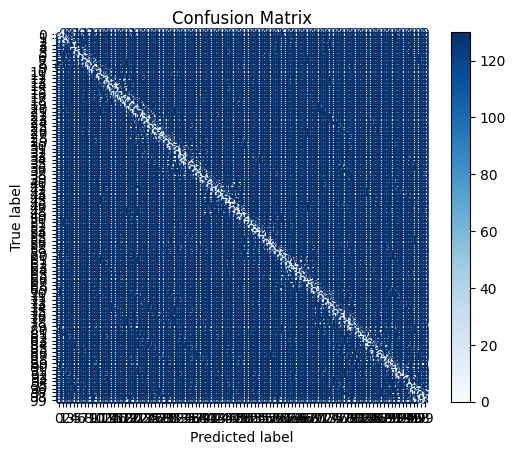

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load Data
data = np.load("mnist_compressed.npz")
train_images, train_labels = data["train_images"], data["train_labels"]
test_images, test_labels = data["test_images"], data["test_labels"]
num_classes = len(np.unique(train_labels))

# Model Definition
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 56, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compile and Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, verbose=1)

# Predictions and Confusion Matrix
y_pred = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


1/1 [==============================] - 0s 99ms/step


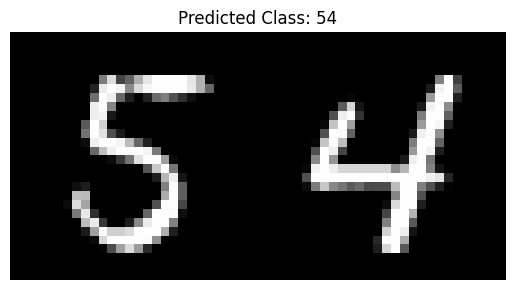

In [3]:
import random

# Select a random sample from the test set
index = random.randint(0, test_images.shape[0] - 1)
sample_image = test_images[index]

# Ensure the image is of shape (28, 56, 1)
sample_image = np.expand_dims(sample_image, axis=-1)

# Predict the class
predicted_class = np.argmax(model.predict(np.expand_dims(sample_image, axis=0)))

# Display the image and prediction
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
